In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Imports and displays dataset

d=pd.read_csv("C:\\Users\\LilyB\Desktop\\Household recycling.csv")
df=pd.DataFrame(d)

display(df.head())
print(df.shape)

'''
The recycling rate is calculated as set out below.

For Waste Collection Authorities (WCA) and Unitary Authorities (UA):
X/Y x 100, where:
X = Tonnage (weight in tons) of household waste collected by the WCA or UA which is sent for recycling/composting 
    (including private/voluntary collections of household waste for recycling)
Y = Total tonnage of household waste collected by the WCA or UA 
    (including private/voluntary collections of household waste for recycling)
'''

,Code,Area,Year,Recycling_Rates
0,E09000001,City of London,2003/04,8
1,E09000002,Barking and Dagenham,2003/04,5
2,E09000003,Barnet,2003/04,16
3,E09000004,Bexley,2003/04,21
4,E09000005,Brent,2003/04,10


(817, 4)


'\nThe recycling rate is calculated as set out below.\n\nFor Waste Collection Authorities (WCA) and Unitary Authorities (UA):\nX/Y x 100, where:\nX = Tonnage (weight in tons) of household waste collected by the WCA or UA which is sent for recycling/composting \n    (including private/voluntary collections of household waste for recycling)\nY = Total tonnage of household waste collected by the WCA or UA \n    (including private/voluntary collections of household waste for recycling)\n'

In [2]:
#Takes the total mean and median recycling rates
recycling_rates = df['Recycling_Rates']

print('Mean:',recycling_rates.mean())
print('Median:',recycling_rates.median())

#Calculates the interquartile range (IQR)
from scipy.stats import iqr

IQR = iqr(recycling_rates)

#Caculates the 1st (Q1) and 3rd (Q3) quartile      
q1=(np.quantile(recycling_rates,0.25))
q3=(np.quantile(recycling_rates,0.75))

#Calculates the outliers among the recycling rate array 
data = np.array(recycling_rates)

threshold= 1.5 * IQR
outliers = np.where((data < q1 - threshold) | (data > q3 + threshold))
print("Outliers of array:", np.sort(data[outliers]))

Mean: 31.769889840881273
Median: 32.0
Outliers of array: []


In [3]:
#Creates a groupby object for Area and finds the average recycling rate per borough

column_name = 'Recycling_Rates'
df_by_area = df.groupby('Area').mean().sort_values(by=column_name, ascending=True)

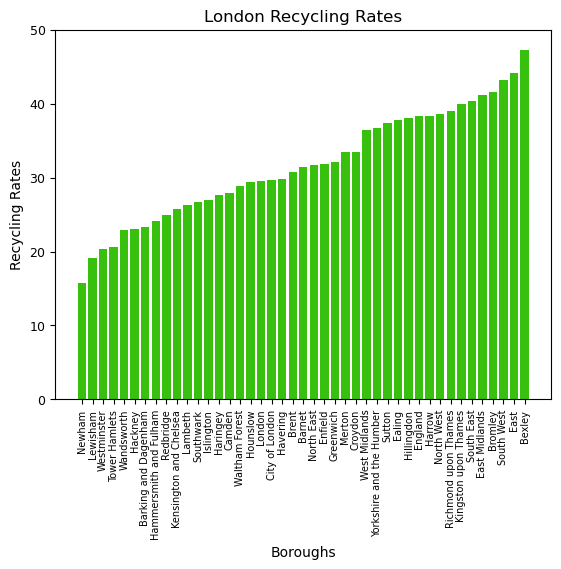

In [4]:
#Creates a graph of the recycling rates of london
x_axis = df_by_area.index
y_axis = df_by_area['Recycling_Rates']

plt.bar(x_axis, y_axis, color='#37C10E')
plt.title('London Recycling Rates')
plt.xlabel('Boroughs')
plt.xticks(rotation = 90)
plt.xticks(fontsize = 7)
plt.ylabel('Recycling Rates')
plt.ylim(0,50)
plt.yticks(fontsize = 9)

plt.show()

In [5]:
#Importing the London poverty rate dataset
x=pd.read_csv("C:\\Users\\LilyB\Desktop\\Poverty rates by London borough (2019_20).csv")
dfx=pd.DataFrame(x)


#Renaming the column 'Unamed: 3' to 'Poverty Rate' as this is the column we are focusing on
dfx.rename(columns={'Unnamed: 3': 'Poverty Rate'}, inplace=True)
display(dfx.head())
print(dfx.shape)

#Removes the rows containing objects that will later cause issues when converting columns from strings to floats
dfx.drop(
    labels=[0,1,35,36,37,38,39],
    axis=0,
    inplace=True)

display(dfx.head())
print(dfx.shape)

,Poverty rates by London borough (2015/2016 - 2019/2020),Unnamed: 1,Unnamed: 2,Poverty Rate,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,London borough,Number in poverty (AHC),Confidence Interval (+/-),Poverty rate (AHC),Poverty rate (AHC) CI Lower,Poverty rate (AHC) CI Upper,Number of people in working families in povert...,Confidence Interval (+/-) (working families),Poverty rate for people in working families,Poverty rate (AHC) CI Lower (working families),Poverty rate (AHC) CI Upper (working families),Proportion of people in poverty in working fam...,In work poverty rate (AHC),Local authority code
2,Barking and Dagenham,82000,10000,29%,24%,34.1%,52000,8000,23%,19%,27.8%,63%,18%,E09000002
3,Barnet,1e+05,14000,25%,21.4%,29.5%,60000,10000,19%,15.4%,23%,60%,15%,E09000003
4,Bexley,58000,10000,29%,23.1%,36.2%,32000,8000,23%,16%,29.9%,55%,16%,E09000004


(41, 14)


,Poverty rates by London borough (2015/2016 - 2019/2020),Unnamed: 1,Unnamed: 2,Poverty Rate,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
2,Barking and Dagenham,82000,10000,29%,24%,34.1%,52000,8000,23%,19%,27.8%,63%,18%,E09000002
3,Barnet,1e+05,14000,25%,21.4%,29.5%,60000,10000,19%,15.4%,23%,60%,15%,E09000003
4,Bexley,58000,10000,29%,23.1%,36.2%,32000,8000,23%,16%,29.9%,55%,16%,E09000004
5,Brent,132000,20000,36%,28.2%,43.7%,92000,20000,30%,22.7%,38.9%,70%,25%,E09000005
6,Bromley,64000,10000,17%,14%,20.2%,44000,10000,14%,11.3%,18%,69%,12%,E09000006


(34, 14)


In [6]:
def cast_to_number(some_text):
    if isinstance(some_text, float):
        return some_text
    no_commas = some_text.replace(',', '')
    no_percent = no_commas.replace('%', '')
    number = float(no_percent)
    return number

dfx['Poverty Rate'] = dfx['Poverty Rate'].apply(cast_to_number)

column_name = 'Poverty Rate'
dfx_by_borough = dfx.groupby('Poverty rates by London borough (2015/2016 - 2019/2020)').mean().sort_values(by=column_name, ascending=True)
#Created the dataset into an object 

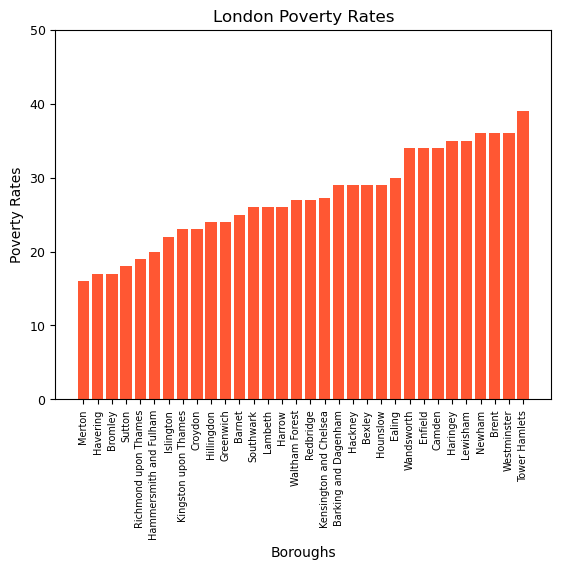

In [7]:
#Creates a graph of the poverty rates of London Boroughs
x_axis = dfx_by_borough.index
y_axis = dfx_by_borough[column_name]

plt.bar(x_axis, y_axis, color='#FF5733')
plt.title('London Poverty Rates')
plt.xlabel('Boroughs')
plt.xticks(rotation = 90)
plt.xticks(fontsize = 7)
plt.ylabel('Poverty Rates')
plt.ylim(0,50)
plt.yticks(fontsize = 9)

plt.show()